In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
iris_df = pd.read_csv("./Iris Flower.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df  = iris_df.drop("Id",axis=1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Petal Width and Petal Length comparision of Iris Species')

<Figure size 2000x500 with 0 Axes>

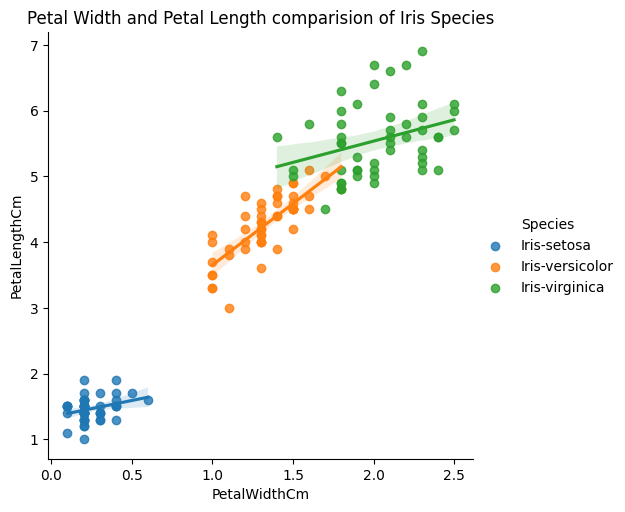

In [9]:
plt.figure(figsize=(20,5))
sns.lmplot(data=iris_df, x = 'PetalWidthCm', y = 'PetalLengthCm' , hue = 'Species')
plt.title("Petal Width and Petal Length comparision of Iris Species")

Text(0.5, 1.0, 'Sepal Width and Length comparision of Iris Species')

<Figure size 2000x500 with 0 Axes>

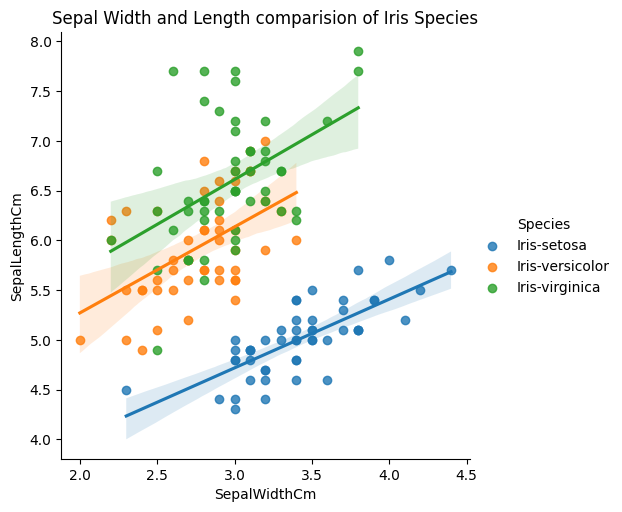

In [8]:
fig = plt.figure(figsize=(20,5))
sns.lmplot(data=iris_df, x = 'SepalWidthCm' , y = 'SepalLengthCm' , hue="Species")
plt.title("Sepal Width and Length comparision of Iris Species")

In [12]:
X = iris_df.drop("Species",axis=1)
y = iris_df["Species"]

In [13]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


1. **SVM model**

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(X,y,test_size=0.25,random_state=41)

model_svm = SVC(kernel='linear')

model_svm.fit(train_X,train_y)

SVC(kernel='linear')

In [16]:
pred_svm = model_svm.predict(test_X)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
accuracy_SVM = accuracy_score(test_y, pred_svm)
print("Accuracy:", accuracy_SVM)

Accuracy: 0.9473684210526315


In [27]:
conf_mat_SVM = confusion_matrix(test_y, pred_svm)
print("Confusion Matrix:")
print(conf_mat_SVM)

Confusion Matrix:
[[10  0  0]
 [ 0 14  1]
 [ 0  1 12]]


In [28]:
report_SVM = classification_report(test_y, pred_svm)
print("Classification Report:")
print(report_SVM)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



**2. KNN Model**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=5)

model_KNN.fit(train_X,train_y)

KNeighborsClassifier()

In [22]:
pred_KNN = model_KNN.predict(test_X)

In [29]:
accuracy_KNN = accuracy_score(test_y, pred_KNN)
print("Accuracy:", accuracy_KNN)

Accuracy: 0.9473684210526315


In [30]:
conf_mat_KNN = confusion_matrix(test_y, pred_svm)
print("Confusion Matrix:")
print(conf_mat_KNN)

Confusion Matrix:
[[10  0  0]
 [ 0 14  1]
 [ 0  1 12]]


In [31]:
report_KNN = classification_report(test_y, pred_KNN)
print("Classification Report:")
print(report_KNN)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



**3. Random Forest Classifier**

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=10, random_state=42)
model_RF.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=42)

In [38]:
pred_RF = model_RF.predict(test_X)

In [39]:
accuracy_RF = accuracy_score(test_y, pred_RF)
print("Accuracy:", accuracy_RF)

Accuracy: 0.9210526315789473


In [40]:
conf_mat_RF = confusion_matrix(test_y, pred_RF)
print("Confusion Matrix:")
print(conf_mat_RF)

Confusion Matrix:
[[10  0  0]
 [ 0 15  0]
 [ 0  3 10]]


In [41]:
report_RF = classification_report(test_y, pred_RF)
print("Classification Report:")
print(report_RF)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.92        38
      macro avg       0.94      0.92      0.93        38
   weighted avg       0.93      0.92      0.92        38

